# Importing Libraries

In [1]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 6.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=68c25aa944905d9a1d83e9dabf6504305b7df99d8721fc9923b81805defb4418
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [2]:
pip install pyarabic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 2.3 MB/s eta 0:00:00


In [3]:
!pip install FarasaPy

In [4]:
pip install farasapy

In [5]:
pip install tashaphyne

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 4.2 MB/s eta 0:00:00


In [6]:
!git clone https://github.com/aub-mind/arabert.git

Cloning into 'arabert'...
remote: Enumerating objects: 600, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 600 (delta 38), reused 45 (delta 30), pack-reused 535
Receiving objects: 100% (600/600), 9.14 MiB | 13.63 MiB/s, done.
Resolving deltas: 100% (339/339), done.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.decomposition import PCA
import re
from yellowbrick.text import TSNEVisualizer
from wordcloud import WordCloud
import pyarabic.araby as araby
from pyarabic.araby import strip_tashkeel
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
# from flask import Flask, request, jsonify
import requests
from langdetect import detect
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import *
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif, f_classif, SelectPercentile, VarianceThreshold
from sklearn.feature_selection import RFE,SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor,BaggingClassifier,AdaBoostClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

import nltk
from nltk.stem.snowball import SnowballStemmer
from farasa.segmenter import FarasaSegmenter
from arabert.preprocess import ArabertPreprocessor

# Load and Explore Data

In [12]:
data = pd.read_csv("/content/arabic-empathetic-conversations.csv")

In [13]:
data.head()

,emotion,context,response
0,sentimental,أتذكر أنني ذهبت لمشاهدة الألعاب النارية مع أعز...,هل كان هذا صديقًا كنت تحبه أم مجرد أفضل صديق؟
1,sentimental,كان هذا أفضل صديق. اشتقت لها.,اين ذهبت؟
2,sentimental,لم نعد نتحدث.,هل كان هذا شيء حدث بسبب جدال؟
3,afraid,أشعر وكأنني ضرب على جدار فارغ عندما أرى الظلام,أجل؟ أنا حقا لا أرى كيف
4,afraid,ألا تشعر بذلك .. إنه لأمر عجيب,أصطدم في الواقع بجدران فارغة في كثير من الأحيا...


In [14]:
data.shape

(36628, 3)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36628 entries, 0 to 36627
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   emotion   36628 non-null  object
 1   context   36628 non-null  object
 2   response  36628 non-null  object
dtypes: object(3)
memory usage: 858.6+ KB


In [16]:
data.describe()

,emotion,context,response
count,36628,36628,36628
unique,32,36093,35344
top,surprised,5,ماذا حدث؟
freq,1886,25,62


In [17]:
data['emotion'].unique()

array(['sentimental', 'afraid', 'proud', 'faithful', 'terrified',
       'joyful', 'angry', 'sad', 'jealous', 'grateful', 'prepared',
       'embarrassed', 'excited', 'annoyed', 'lonely', 'ashamed', 'guilty',
       'surprised', 'nostalgic', 'confident', 'furious', 'disappointed',
       'caring', 'trusting', 'disgusted', 'anticipating', 'anxious',
       'hopeful', 'content', 'impressed', 'apprehensive', 'devastated'],
      dtype=object)

In [18]:
# Define a function to check the language of a text
def detect_language(text):
    try:
        lang = detect(text)
        return lang
    except:
        return None

In [19]:
data['language'] = data['response'].apply(detect_language)
data['language'] = data['context'].apply(detect_language)

# Filter out English rows
data = data[data['language'] != 'en']

# Remove English columns
data = data.drop('language', axis=1)

##convert emotion


In [20]:
mapping_dict = {
    "excited": "joy",
    "proud": "joy",
    "grateful": "joy",
    "hopeful": "joy",
    "confident": "joy",
    "joyful"  : "joy",
    "content" : "joy",
    "prepared": "joy",

    "anticipating": "Love",
    "caring": "Love",
    "sentimental": "Love",
    "trusting": "Love",
    "faithful": "Love",
    "nostalgic": "Love",

    "surprised":"surprise",
    "impressed":"surprise",

    "sad": "Sadness",
    "lonely": "Sadness",
    "guilty": "Sadness",
    "disappointed": "Sadness",
    "devastated": "Sadness",
    "embarrassed": "Sadness",
    "ashamed": "Sadness",

    "angry":"anger",
    "annoyed":"anger",
    "furious":"anger",
    "disgusted":"anger",
    "jealous":"anger",

    "afraid":"fear",
    "terrified":"fear",
    "anxious":"fear",
    "apprehensive":"fear",
}

In [21]:
data["emotion"]=data["emotion"].replace(mapping_dict)

In [22]:
data["emotion"].unique()

array(['Love', 'fear', 'joy', 'anger', 'Sadness', 'surprise'],
      dtype=object)

In [ ]:
arabic_stop_words = [
    "،", "آض", "آمينَ", "آه", "آهاً", "آي", "أ", "أب", "أجل", "أجمع",
    "أخ", "أخذ", "أصبح", "أضحى", "أقبل", "أقل", "أكثر", "ألا", "أم", "أما",
    "إذا", "إذما", "إذن", "أمامك", "أمامكَ", "إذاً", "أمسى", "أمّا", "أو", "أوشك",
    "أولئك", "أولئكم", "أولاء", "أولالك", "أوّهْ", "أي", "أيا", "أين", "أيّ","مثل", "ثم","لقد","لا","ذلك",
    "أَنَّ", "أَنَّا", "أَنَّى", "أَنَا", "أَنَت", "أنتم", "أنتما", "أنتماك", "أنتِ", "أنتنّ","وكان","بعض"
    "أنثى", "أنجم", "أنس", "أنفاس", "أنفس", "أنفسكم", "أنفسه", "أنفسي", "أنك", "أنّى","علي"
    "أنتنّ", "أيّان", "أَيُّ", "أُفٍّ", "أُقَرُّ", "أُكَوِي", "أَهٰـ", "أَو", "أَوْ", "أَيْ","جدا","نعم","لدي","شيء","شيئ","لكنني"
    "على", "في", "من", "إلى", "عن", "مع", "هذا", "هذه", "أنا", "أنت","كانت","كان","اليوم","بعض","لأنني"
    "هو", "هي", "نحن", "أنتم", "هم", "هنا", "كان", "عند", "لكن", "لم","أيضا","لذلك","كنت","الآن",
    "ما", "ماذا", "كيف", "أين", "لماذا", "هل","حقا","فقط","عندما","أن","أنه","بعد","كل","التي","إنه","إنها","حتى","ولكن","لكنها","لي","هناك"]
def preprocess_arabic_text(text):
    # Remove diacritics (Tashkeel) to standardize text
    text = strip_tashkeel(text)

    # Normalize Arabic text to standard form
    text = araby.normalize_ligature(text)

    # Remove non-Arabic characters, numbers, and extra spaces
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    text = ' '.join([word for word in text.split() if word not in arabic_stop_words])
    return text

In [ ]:
from arabic_reshaper import reshape
from bidi.algorithm import get_display

In [ ]:
def WordCloudPlot(text,title):
    # Combine all the Arabic text in the "context" column into a single string
    arabic_text = ' '.join(text)

    # Reshape and display Arabic text correctly using arabic_reshaper and bidi
    reshaped_text = reshape(arabic_text)
    display_text = get_display(reshaped_text)

    # Generate the Word Cloud
    wordcloud = WordCloud(font_path="karim-lt-regular.ttf", background_color="white").generate(display_text)

    # Display the Word Cloud using matplotlib
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(title+" WordCloud")
    plt.axis("off")
    plt.show()

In [ ]:
data['context'] = data['context'].apply(preprocess_arabic_text)

In [ ]:
love_context = [text for text in data['context'][data['emotion'] == "Love"]]
joy_context = [text for text in data['context'][data['emotion'] == "joy"]]
sadness_context = [text for text in data['context'][data['emotion'] == "Sadness"]]
fear_context = [text for text in data['context'][data['emotion'] == "fear"]]
anger_context = [text for text in data['context'][data['emotion'] == "anger"]]
surprise_context = [text for text in data['context'][data['emotion'] == "surprise"]]

('بعد', 'كل', 'التي', 'إنه', 'إنها', 'حتى')

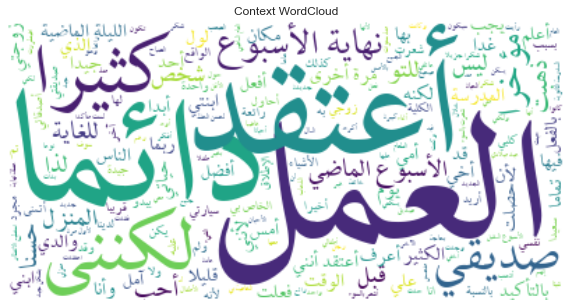

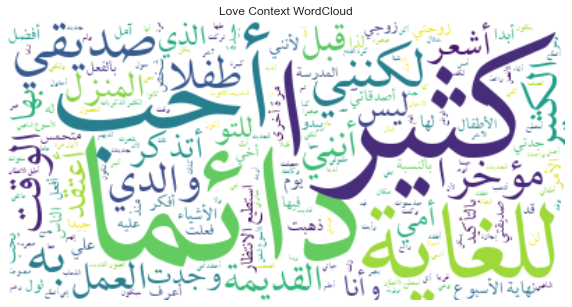

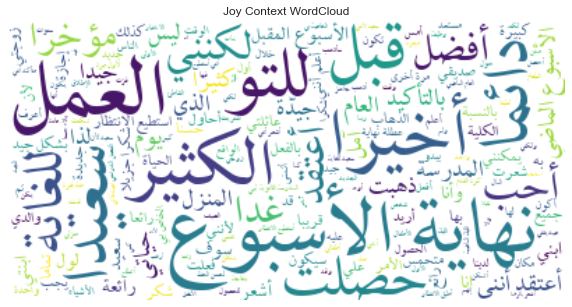

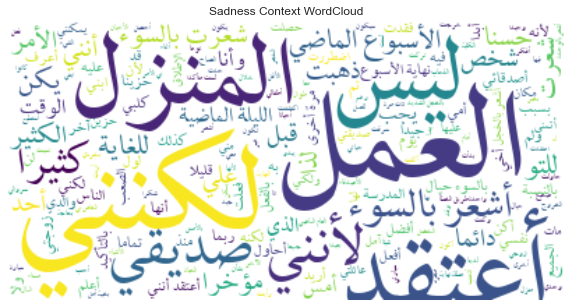

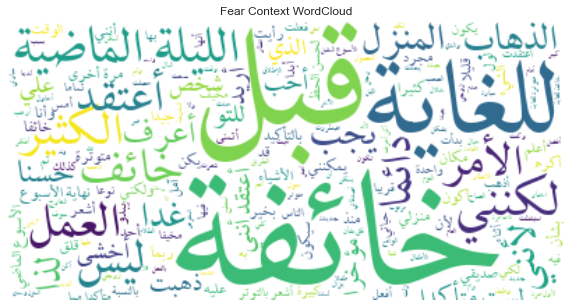

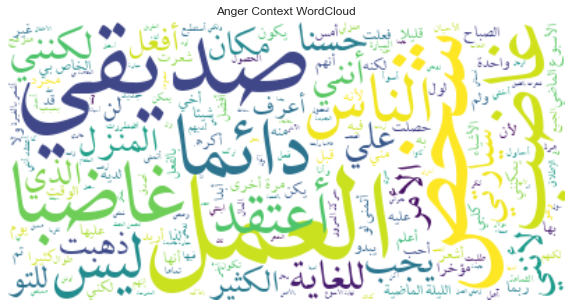

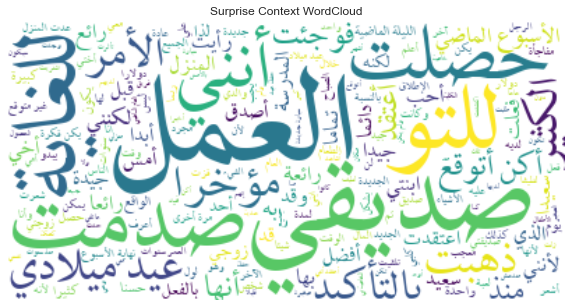

In [ ]:
WordCloudPlot(data['context'],"Context")
WordCloudPlot(love_context,"Love Context")
WordCloudPlot(joy_context,"Joy Context")
WordCloudPlot(sadness_context,"Sadness Context")
WordCloudPlot(fear_context,"Fear Context")
WordCloudPlot(anger_context,"Anger Context")
WordCloudPlot(surprise_context,"Surprise Context")


In [23]:
stemmer = SnowballStemmer("arabic")

In [24]:
def stem_arabic_text(text):
    # Tokenize the text
    words = text.split()

    # Stem the words
    stemmed_words = [stemmer.stem(word) for word in words]

    # Reconstruct the text
    stemmed_text = " ".join(stemmed_words)

    return stemmed_text

In [25]:
data.isnull().sum()

emotion     0
context     0
response    0
dtype: int64

In [26]:
data.duplicated().sum()

5

In [ ]:
data[data.duplicated()]

,emotion,context,response
18572,Love,لا أستطيع الانتظار لأحدث لعبة بوكيمون ، إنها ت...,هذه الألعاب تبدو ممتعة
18625,Sadness,ماذا تعني؟,لقد قلت إنهم لم يكن لديهم مباشرة في فترة ما ، ...
25762,joy,أنا متحمس للموسم الكروي القادم ، يمكن أن يكرر ...,Are you a big Eagles fan?
26482,Love,جراحة قلب والد زوجتي الأسبوع المقبل,أوه ، يجب أن يكون ذلك مرهقًا. هل تعتقد أنه سيك...
27810,Love,كنت أعلم أنه لا ينبغي أن أثق بأخي مع كلبي,ماذا حدث؟


In [27]:
data = data.drop_duplicates()

In [28]:
data.duplicated().sum()

0

In [29]:
le = LabelEncoder()
data['emotion_encoded'] = le.fit_transform(data['emotion'])

In [30]:
data.head()

,emotion,context,response,emotion_encoded
0,Love,أتذكر أنني ذهبت لمشاهدة الألعاب النارية مع أعز...,هل كان هذا صديقًا كنت تحبه أم مجرد أفضل صديق؟,0
1,Love,كان هذا أفضل صديق. اشتقت لها.,اين ذهبت؟,0
2,Love,لم نعد نتحدث.,هل كان هذا شيء حدث بسبب جدال؟,0
3,fear,أشعر وكأنني ضرب على جدار فارغ عندما أرى الظلام,أجل؟ أنا حقا لا أرى كيف,3
4,fear,ألا تشعر بذلك .. إنه لأمر عجيب,أصطدم في الواقع بجدران فارغة في كثير من الأحيا...,3


In [31]:
data.tail()

,emotion,context,response,emotion_encoded
36623,fear,احترق منزلي في الليلة السابقة ، واضطررت إلى إخ...,يا إلهي ، هذا مخيف جدًا ، أنا آسف جدًا لسماع ذلك.,3
36624,Love,كنت أتصفح الأشياء في العلية الليلة الماضية,هل وجدت أي شيء عظيم؟,0
36625,Love,نعم وجدت بعض الصور القديمة عندما اعتدنا نحن ال...,يا لها من ذكرى رائعة.,0
36626,surprise,استيقظت هذا الصباح على زوجتي تخبرني أنها حامل!,يا هذا رائع! هذا رائع أليس كذلك؟,5
36627,surprise,إنه رائع جدا. لقد كنا نريد طفلًا لفترة طويلة. ...,هذا رائع!!!! تهانينا!,5


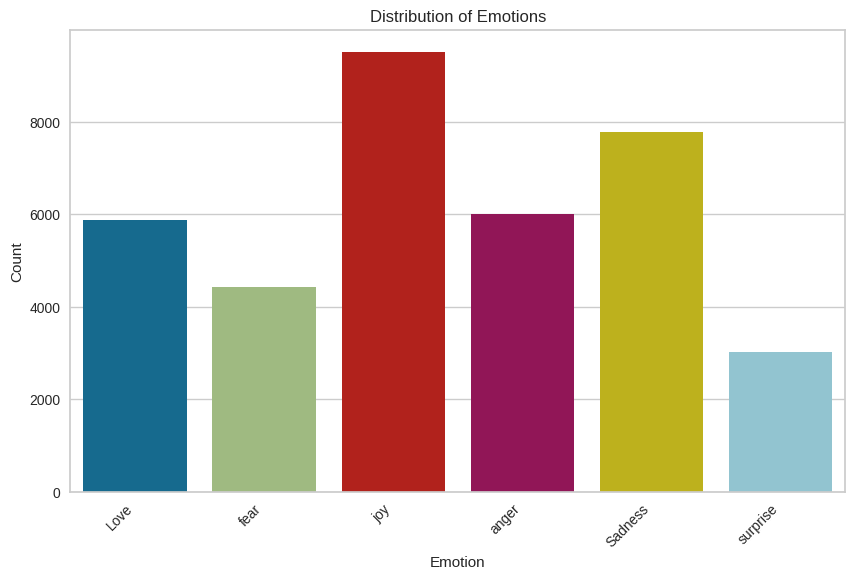

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='emotion', data=data)
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
from farasa.pos import FarasaPOSTagger
from farasa.ner import FarasaNamedEntityRecognizer
from farasa.diacratizer import FarasaDiacritizer
from farasa.segmenter import FarasaSegmenter
from farasa.stemmer import FarasaStemmer

In [33]:
def preprocess_arabic_text(text):
    # Remove diacritics (Tashkeel) to standardize text
    text = strip_tashkeel(text)

    # Normalize Arabic text to standard form
    text = araby.normalize_ligature(text)

    # Remove non-Arabic characters, numbers, and extra spaces
    text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [ ]:
"""# Combine all the context texts into a single string
all_text = ' '.join(data['context'])


# Create the word cloud
wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=400,
    max_words=200,
    collocations=False,
).generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()"""


'# Combine all the context texts into a single string\nall_text = \' \'.join(data[\'context\'])\n\n\n# Create the word cloud\nwordcloud = WordCloud(\n    background_color=\'white\',\n    width=800,\n    height=400,\n    max_words=200,\n    collocations=False,\n).generate(all_text)\n\n# Display the word cloud\nplt.figure(figsize=(10, 5))\nplt.imshow(wordcloud, interpolation=\'bilinear\')\nplt.axis("off")\nplt.show()'

# Feature Engineering

In [40]:
# Split the data
X = data['context']
y = data['emotion_encoded']

In [41]:
X

0        أتذكر أنني ذهبت لمشاهدة الألعاب النارية مع أعز...
1                            كان هذا أفضل صديق. اشتقت لها.
2                                            لم نعد نتحدث.
3           أشعر وكأنني ضرب على جدار فارغ عندما أرى الظلام
4                           ألا تشعر بذلك .. إنه لأمر عجيب
                               ...                        
36623    احترق منزلي في الليلة السابقة ، واضطررت إلى إخ...
36624           كنت أتصفح الأشياء في العلية الليلة الماضية
36625    نعم وجدت بعض الصور القديمة عندما اعتدنا نحن ال...
36626       استيقظت هذا الصباح على زوجتي تخبرني أنها حامل!
36627    إنه رائع جدا. لقد كنا نريد طفلًا لفترة طويلة. ...
Name: context, Length: 36621, dtype: object

In [43]:
X = X.apply(preprocess_arabic_text)

In [44]:
X

0        أتذكر أنني ذهبت لمشاهدة الألعاب النارية مع أعز...
1                              كان هذا أفضل صديق اشتقت لها
2                                             لم نعد نتحدث
3           أشعر وكأنني ضرب على جدار فارغ عندما أرى الظلام
4                              ألا تشعر بذلك إنه لأمر عجيب
                               ...                        
36623    احترق منزلي في الليلة السابقة ، واضطررت إلى إخ...
36624           كنت أتصفح الأشياء في العلية الليلة الماضية
36625    نعم وجدت بعض الصور القديمة عندما اعتدنا نحن ال...
36626        استيقظت هذا الصباح على زوجتي تخبرني أنها حامل
36627    إنه رائع جدا لقد كنا نريد طفلا لفترة طويلة لا ...
Name: context, Length: 36621, dtype: object

In [45]:
X = X.apply(stem_arabic_text)

In [46]:
X

0        اتذكر انن ذهب مشاهد العاب نار مع اعز اصدقاء كا...
1                               كان هذا افضل صديق اشتق لها
2                                             لم نعد نتحدث
3                 اشعر وكء ضرب على جدار فارغ عندم ارى ظلام
4                               الا تشعر بذل انه لامر عجيب
                               ...                        
36623          احترق منزل في ليل سابق  واضطرر الى اخراج ام
36624                      كنت اتصفح اشياء في العل ليل ماض
36625    نعم وجد بعض صور قديم عندم اعتد نحن اطفال ذهاب ...
36626                استيقظ هذا صباح على زوج تخبر انه حامل
36627    انه رايع جدا لقد كنا نريد طفل لفتر طويل لا است...
Name: context, Length: 36621, dtype: object

In [ ]:
print(X.isnull().sum())

0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Transform to TF-IDF
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data using the same vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
df_tfidf = pd.DataFrame(X_train_tfidf.toarray(),columns=tfidf_vectorizer.get_feature_names_out())

In [ ]:
df_tfidf.head()

,00,000,10,100,1000,10000,100000,101,103,104,...,يون,يونان,يوناني,يونايتد,يونس,يونيفرسال,يونيو,يويو,ييكيس,ييل
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Transform to Bow
vectorizer_bow = CountVectorizer()
X_train_bow = vectorizer_bow.fit_transform(X_train)

X_test_bow = tfidf_vectorizer.transform(X_test)

In [ ]:
df_bow = pd.DataFrame(X_train_bow.toarray(),columns=vectorizer_bow.get_feature_names_out())

In [ ]:
df_bow.head()

,00,000,10,100,1000,10000,100000,101,103,104,...,يون,يونان,يوناني,يونايتد,يونس,يونيفرسال,يونيو,يويو,ييكيس,ييل
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
tsne_tf = TSNEVisualizer(title="TSNE Plot of TFIDF")
tsne_tf.fit(df_tfidf,data["emotion"])
tsne_tf.show()

/usr/local/lib/python3.10/dist-packages/yellowbrick/text/tsne.py:401: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  self.ax.scatter(


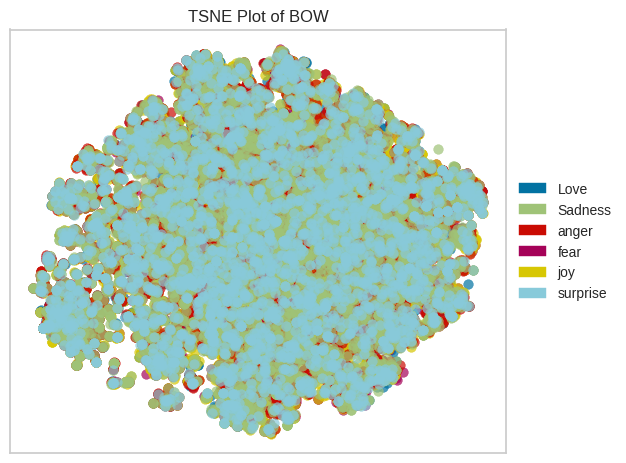

<Axes: title={'center': 'TSNE Plot of BOW'}>

In [ ]:
tsne_bow = TSNEVisualizer(title="TSNE Plot of BOW")
tsne_bow.fit(df_bow,data["emotion"])

tsne_bow.show()

# Clustering

In [ ]:
# Extract the context only
context = data['context']
context = context.apply(preprocess_arabic_text)

In [ ]:
# create vectorizer
vectorizer = TfidfVectorizer()

# vectorizer the text documents
vectorized_documents = vectorizer.fit_transform(context)

In [ ]:
# reduce the dimensionality of the data using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(vectorized_documents.toarray())

In [ ]:
# cluster the documents using k-means
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, n_init=5,
                max_iter=500, random_state=42)
kmeans.fit(vectorized_documents)

In [ ]:
# create a dataframe to store the results
results = pd.DataFrame()
results['document'] = context
results['cluster'] = kmeans.labels_

# print the results
#print(results.sample(5))

# plot the results
colors = ['pink', 'yellow', 'blue', 'red', 'purple']
cluster = ['Love','joy', 'Sadness', 'anger', 'fear']
for i in range(num_clusters):
    plt.scatter(reduced_data[kmeans.labels_ == i, 0],
                reduced_data[kmeans.labels_ == i, 1],
                s=10, color=colors[i],
                label=f' {cluster[i]}')
plt.legend()
plt.show()

In [ ]:
# Calculate the silhouette score
silhouette_avg = silhouette_score(reduced_data, kmeans.labels_)

# Print the silhouette score
print("Silhouette Score:", silhouette_avg

# Classification

In [ ]:
class EmotionClassifier:
    def __init__(self):
        self.tfidf_vectorizer = TfidfVectorizer()
        self.clf_nb = MultinomialNB()
        self.clf_svm = SVC()
        self.clf_lr = LogisticRegression()

    def preprocess_text(self, text):
        # Remove diacritics (Tashkeel) to standardize text
        text = strip_tashkeel(text)

        # Normalize Arabic text to standard form
        text = araby.normalize_ligature(text)

        # Remove non-Arabic characters, numbers, and extra spaces
        text = re.sub(r'[^\u0600-\u06FF\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
        return text

    def train(self, X_train, y_train):
        X_train_processed = [self.preprocess_text(text) for text in X_train]
        X_train_tfidf = self.tfidf_vectorizer.fit_transform(X_train_processed)

        self.clf_nb.fit(X_train_tfidf, y_train)
        self.clf_svm.fit(X_train_tfidf, y_train)
        self.clf_lr.fit(X_train_tfidf, y_train)

    def predict(self, X_test):
        X_test_processed = [self.preprocess_text(text) for text in X_test]
        X_test_tfidf = self.tfidf_vectorizer.transform(X_test_processed)

        y_pred_nb = self.clf_nb.predict(X_test_tfidf)
        y_pred_svm = self.clf_svm.predict(X_test_tfidf)
        y_pred_lr = self.clf_lr.predict(X_test_tfidf)

        return y_pred_nb, y_pred_svm, y_pred_lr

    def evaluate_accuracy(self, X_val, y_val):
        X_val_processed = [self.preprocess_text(text) for text in X_val]
        X_val_tfidf = self.tfidf_vectorizer.transform(X_val_processed)

        y_pred_nb = self.clf_nb.predict(X_val_tfidf)
        y_pred_svm = self.clf_svm.predict(X_val_tfidf)
        y_pred_lr = self.clf_lr.predict(X_val_tfidf)

        accuracy_nb = accuracy_score(y_val, y_pred_nb)
        accuracy_svm = accuracy_score(y_val, y_pred_svm)
        accuracy_lr = accuracy_score(y_val, y_pred_lr)

        return accuracy_nb, accuracy_svm, accuracy_lr

In [ ]:
# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
X_train

29570    كما قال سكارفيس ، " لا يوجد أحد أثق ب ه إلا أن...
10300    إن ها وظيف   +ة هندسي   +ة و لكن ب شكل أساسي ل...
27741    يحتاج فقط إلى تجميع ها ل و  ل  إن ه متعب من ال...
8342           لس ت متأكد ا ، أعتقد أنني كن ت قلق ا من ذلك
6811     اشترى صديق ي ل ال تو سيار   +ة رياضي   +ة جميل...
                               ...                        
16850                     هل سبق ل ك أن ذهب ت إلى ال بحر ؟
6265     لقد شعر ت ب ال ضيق في عيد ال أم هذا ل أن والد ...
11284    سأل ت زميل ي في ال عمل . قال ت نعم . لم اعتقد ...
860                   لقد خدع ت صديق ي مر   +ة واحد   +ة .
15795    ب صراح   +ة لا يمكن ك معرف   +ة ما إذا كان ت ط...
Name: context, Length: 25636, dtype: object

In [ ]:
classifier = EmotionClassifier()
classifier.train(X_train, y_train)

# Evaluate accuracy on the validation set
y_pred_nb, y_pred_svm, y_pred_lr = classifier.predict(X_val)

accuracy_nb = accuracy_score(y_val, y_pred_nb)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
accuracy_lr = accuracy_score(y_val, y_pred_lr)

print("Naive Bayes Accuracy on Validation Set:", accuracy_nb)
print("SVM Accuracy on Validation Set:", accuracy_svm)
print("Logistic Regression Accuracy on Validation Set:", accuracy_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes Accuracy on Validation Set: 0.4880757327507737
SVM Accuracy on Validation Set: 0.550336792281085
Logistic Regression Accuracy on Validation Set: 0.542144547606044


# Evaluation

In [ ]:
confusion_matrix_nb, confusion_matrix_svm, confusion_matrix_lr = \
    confusion_matrix(y_val, y_pred_nb), confusion_matrix(y_val, y_pred_svm), confusion_matrix(y_val, y_pred_lr)

print(confusion_matrix_nb)
print(confusion_matrix_svm)
print(confusion_matrix_lr)

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(conf_matrix, labels):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

# Convert the integer labels back to emotion labels
emotion_labels = {0: 'Love', 1: 'Sadness', 2: 'Anger', 3: 'Fear', 4: 'Joy', 5: 'Surprise'}

# Calculate confusion matrices
confusion_matrix_nb = confusion_matrix(y_val, y_pred_nb)
confusion_matrix_svm = confusion_matrix(y_val, y_pred_svm)
confusion_matrix_lr = confusion_matrix(y_val, y_pred_lr)

# Convert the arrays to emotion labels
labels = [emotion_labels[label] for label in range(len(emotion_labels))]

# Plot confusion matrices
print("Confusion matrix for NB")
plot_confusion_matrix(confusion_matrix_nb, labels)
print("Confusion matrix for svm")
plot_confusion_matrix(confusion_matrix_svm, labels)
print("Confusion matrix for LR")
plot_confusion_matrix(confusion_matrix_lr, labels)

In [ ]:
from sklearn.metrics import classification_report

# Convert the integer labels back to emotion labels
emotion_labels = {0: 'Love', 1: 'Sadness', 2: 'Anger', 3: 'Fear', 4: 'Joy', 5: 'Surprise'}

# Convert the arrays to emotion labels
y_val_labels = [emotion_labels[label] for label in y_val]
y_pred_nb_labels = [emotion_labels[label] for label in y_pred_nb]
y_pred_svm_labels = [emotion_labels[label] for label in y_pred_svm]
y_pred_lr_labels = [emotion_labels[label] for label in y_pred_lr]

# Calculate classification report
classification_report_nb = classification_report(y_val_labels, y_pred_nb_labels)
classification_report_svm = classification_report(y_val_labels, y_pred_svm_labels)
classification_report_lr = classification_report(y_val_labels, y_pred_lr_labels)

print("Classification Report - Naive Bayes:")
print(classification_report_nb)
print("Classification Report - SVM:")
print(classification_report_svm)
print("Classification Report - Logistic Regression:")
print(classification_report_lr)

### On testset

In [ ]:
accuracy_test_nb, accuracy_test_svm, accuracy_test_lr = classifier.evaluate_accuracy(X_test, y_test)

In [ ]:
print(accuracy_test_nb)
print(accuracy_test_svm)
print(accuracy_test_lr)

# Error Analysis

In [ ]:
# Create a dictionary to map encoded emotions to their labels
emotions = {0: 'Love', 3: 'fear', 4: 'joy', 2: 'anger', 1: 'Sadness', 5: 'surprise'}

# Function to get misclassified instances and their true and predicted emotions
def get_misclassified_instances(y_true, y_pred, emotions):
    misclassified_instances = []
    for true_label, pred_label in zip(y_true, y_pred):
        if true_label != pred_label:
            true_emotion = emotions[true_label]
            pred_emotion = emotions[pred_label]
            misclassified_instances.append((true_emotion, true_label, pred_emotion, pred_label))
    return misclassified_instances

# Function to display misclassified instances
def display_misclassified_instances(misclassified_instances):
    for idx, (true_emotion, true_label, pred_emotion, pred_label) in enumerate(misclassified_instances, start=1):
        print(f"{idx}. True Emotion: {true_emotion}, Predicted Emotion: {pred_emotion}")
        print(f"   True Label: {true_label}, Predicted Label: {pred_label}")
        print()

# Instantiate and train the EmotionClassifier
classifier = EmotionClassifier()
classifier.train(X_train, y_train)

# Evaluate accuracy on the validation set
accuracy_nb, accuracy_svm, accuracy_lr = classifier.evaluate_accuracy(X_val, y_val)

# Perform error analysis for all classifiers
y_pred_nb, y_pred_svm, y_pred_lr = classifier.predict(X_val)
misclassified_nb = get_misclassified_instances(y_val, y_pred_nb, emotions)
misclassified_svm = get_misclassified_instances(y_val, y_pred_svm, emotions)
misclassified_lr = get_misclassified_instances(y_val, y_pred_lr, emotions)

# Display misclassified instances for each classifier
print("Misclassified Instances - Naive Bayes")
display_misclassified_instances(misclassified_nb)

print("Misclassified Instances - SVM")
display_misclassified_instances(misclassified_svm)

print("Misclassified Instances - Logistic Regression")
display_misclassified_instances(misclassified_lr)


In [ ]:
for i, misclassified_sample in enumerate(misclassified_nb, 1):
    true_emotion, predicted_emotion, true_label, predicted_label = misclassified_sample

In [ ]:
# For Naive Bayes
misclassified_emotions = [misclassified_sample[0] for misclassified_sample in misclassified_nb]
true_labels = [misclassified_sample[2] for misclassified_sample in misclassified_nb]
predicted_labels = [misclassified_sample[3] for misclassified_sample in misclassified_nb]

plt.figure(figsize=(10, 6))
plt.bar(range(len(misclassified_nb)), true_labels, color='grey', alpha=0.3)
plt.bar(range(len(misclassified_nb)), predicted_labels, color='r', alpha=0.6)
plt.xticks(range(len(misclassified_nb)), range(1, len(misclassified_nb) + 1), rotation=45)
plt.xlabel('Misclassified Samples')
plt.ylabel('Emotion Label')
plt.title('Misclassified Samples from Naive Bayes')
plt.legend(['True Label', 'Predicted Label'])
plt.tight_layout()
plt.show()

In [ ]:
# For Logistic Regression
misclassified_emotions_lr = [misclassified_sample[0] for misclassified_sample in misclassified_lr]
true_labels_lr = [misclassified_sample[2] for misclassified_sample in misclassified_lr]
predicted_labels_lr = [misclassified_sample[3] for misclassified_sample in misclassified_lr]

plt.figure(figsize=(10, 6))
plt.bar(range(len(misclassified_lr)), true_labels_lr, color='grey', alpha=0.3)
plt.bar(range(len(misclassified_lr)), predicted_labels_lr, color='r', alpha=0.6)
plt.xticks(range(len(misclassified_lr)), range(1, len(misclassified_lr) + 1), rotation=45)
plt.xlabel('Misclassified Samples (Logistic Regression)')
plt.ylabel('Emotion Label')
plt.title('Misclassified Samples from Logistic Regression')
plt.legend(['True Label', 'Predicted Label'])
plt.tight_layout()
plt.show()

In [ ]:
# For SVM
misclassified_emotions_svm = [misclassified_sample[0] for misclassified_sample in misclassified_svm]
true_labels_svm = [misclassified_sample[2] for misclassified_sample in misclassified_svm]
predicted_labels_svm = [misclassified_sample[3] for misclassified_sample in misclassified_svm]

plt.figure(figsize=(10, 6))
plt.bar(range(len(misclassified_svm)), true_labels_svm, color='grey', alpha=0.3)
plt.bar(range(len(misclassified_svm)), predicted_labels_svm, color='r', alpha=0.6)
plt.xticks(range(len(misclassified_svm)), range(1, len(misclassified_svm) + 1), rotation=45)
plt.xlabel('Misclassified Samples (SVM)')
plt.ylabel('Emotion Label')
plt.title('Misclassified Samples from SVM')
plt.legend(['True Label', 'Predicted Label'])
plt.tight_layout()
plt.show()